# Astronaut Deconvolution

This example demonstrates deconvolution of a single 2D image in the style of this [Scikit-Image](http://scikit-image.org/docs/dev/auto_examples/filters/plot_deconvolution.html) example.

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import data as sk_data
from skimage import color as sk_color
from flowdec import data as fd_data
from scipy.signal import fftconvolve
from flowdec import restoration as fd_restoration

CPU times: user 3.24 s, sys: 81.3 ms, total: 3.32 s
Wall time: 3.12 s


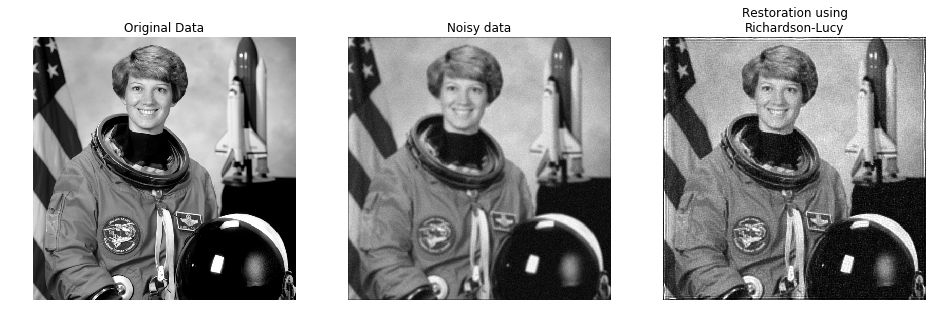

In [17]:
%%time 

# Load skimage "Astro" 2D image and generate a fake PSF
img = sk_color.rgb2gray(sk_data.astronaut())
psf = np.ones((5, 5)) / 25

# Add blur and noise to Image
np.random.seed(1)
img_blur = fftconvolve(img, psf, 'same') + (np.random.poisson(lam=25, size=img.shape) - 10) / 255.

# Initialize Tensorflow graph for 2-dimensional deconvolution -- better to do this
# one time rather than in a loop with multiple images as there is significant
# overhead in creating a TF graph (at least a few seconds)
algo = fd_restoration.RichardsonLucyDeconvolver(n_dims=img.ndim).initialize()

# Wrap image and PSF in "Acqusition" instance, which aids in doing comparisons and running
# operations on all data associated with a data acquisition
acquisition = fd_data.Acquisition(data=img_blur, kernel=psf)

# Run 30 RL iterations
img_decon = algo.run(acquisition, niter=30).data

# Plot results and original
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
plt.gray()
for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(img)
ax[0].set_title('Original Data')

ax[1].imshow(img_blur)
ax[1].set_title('Noisy data')

ax[2].imshow(img_decon, vmin=img_blur.min(), vmax=img_blur.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')

# Note: There are some obvious ringing artifacts in the deconvolved result around the edges, 
# something that can be alleviated to a degree by forcing the dimensions of the images to be
# padded out and filled in with the reflection of the image before deconvolving.  This can
# be controlled via the `pad_mode` and `pad_min` arguments to RichardsonLucyDeconvolver